# Random Number Generation

With computers, when we generate random numbers, we are in fact generating pseudo-random numbers.  That is, we are generating a LONG sequence of numbers that appear random, but in fact the sequence will eventually repeat.  Quantum computing offers the possibility of generating true random numbers, but that is beyond the scope of this course.

The most common algorithm for generating pseudo-random numbers is the linear congruential generator (LCG).  The LCG algorithm is defined by the following equation:

$$X_{n+1} = (a X_n + b) \mod m$$

where $X_{n+1}$ is the next random number in the sequence, $a$ is the multiplier, $b$ is the increment, and $m$ is the modulus.  The modulus is usually a large prime number.  The multiplier and increment are usually chosen to be large numbers that are relatively prime to the modulus.  The modulus, multiplier, and increment are called the LCG parameters.

## Example

Let's look at an example of a really bad LCG algorithm.  We will use the following parameters:

a = 7
b = 1
m = 11

We will start with a seed value (i.e. $X_0$) of 1.  The first few random numbers are:

$$X_0 = 1$$
$$X_1 = (7 \times 1 + 1) \mod 11 = 8$$
$$X_2 = (7 \times 8 + 1) \mod 11 = 2$$
$$X_3 = (7 \times 2 + 1) \mod 11 = 4$$
$$X_4 = (7 \times 4 + 1) \mod 11 = 7$$
$$X_5 = (7 \times 7 + 1) \mod 11 = 6$$
$$X_6 = (7 \times 6 + 1) \mod 11 = 10$$
$$X_7 = (7 \times 10 + 1) \mod 11 = 5$$
$$X_8 = (7 \times 5 + 1) \mod 11 = 3$$
$$X_9 = (7 \times 3 + 1) \mod 11 = 0$$
$$X_{10} = (7 \times 0 + 1) \mod 11 = 1$$

So, we see that the sequence repeats after 10 numbers.  This is a really bad LCG algorithm.  In practice, the modulus is usually a large prime number, and the multiplier and increment are chosen to be large numbers that are relatively prime to the modulus.  This ensures that the sequence will be long before it repeats.

The following Wikipedia article has a good discussion of LCG algorithms:

https://en.wikipedia.org/wiki/Linear_congruential_generator

You will note that this page contains a table that shows the LCG parameters for several different random number generators.  The LCG parameters for the EJB algorithm are:

a = 16807
b = 0
m = 2147483647 (i.e. $2^{31} - 1$)

This value of $m$ is the largest prime number that can be stored in a 32-bit integer.  It is a Mersenne prime number, and was discovered by Leonhard Euler in 1772.

These are the same parameters used by the Apple CarbonLib random number generator, as well as the C++-11 minstd_rand random number generator.
 

In [1]:
def seedLCG(initVal):
    global rand
    rand = initVal
    
def rand_ejb():
    a = 16807
    m = 2147483647
    b = 0
    
    #a = 7
    #b = 1
    #m = 11
    
    global rand
    
    rand = (a*rand + b) % m
    return rand/m

# Comparison of Random Number Generation Algorithms

Let's compare the random number generation algorithm used by the Python random module with the LCG algorithm used by the EJB algorithm.  We will generate 10 million random numbers using each algorithm and plot the results.  We will also calculate the three-sigma error for each algorithm.  The three-sigma error is defined as:

$$\sigma = \frac{3}{\sqrt{N/M}}$$

where $N$ is the number of random numbers generated and $M$ is the number of bins in the histogram.  The three-sigma error is the error that we would expect to see 99.7% of the time.  If the error is larger than this, then we know that something is wrong with the random number generation algorithm.

We can generate real random numbers between 0 and 1 using an LCG algorithm by simply taking the value of the sequence and divding by $m$ (since the sequence is between 0 and $m-1$).


elapsed time = 2.410
elapsed time = 2.050
Three-sigma Error = 0.030000


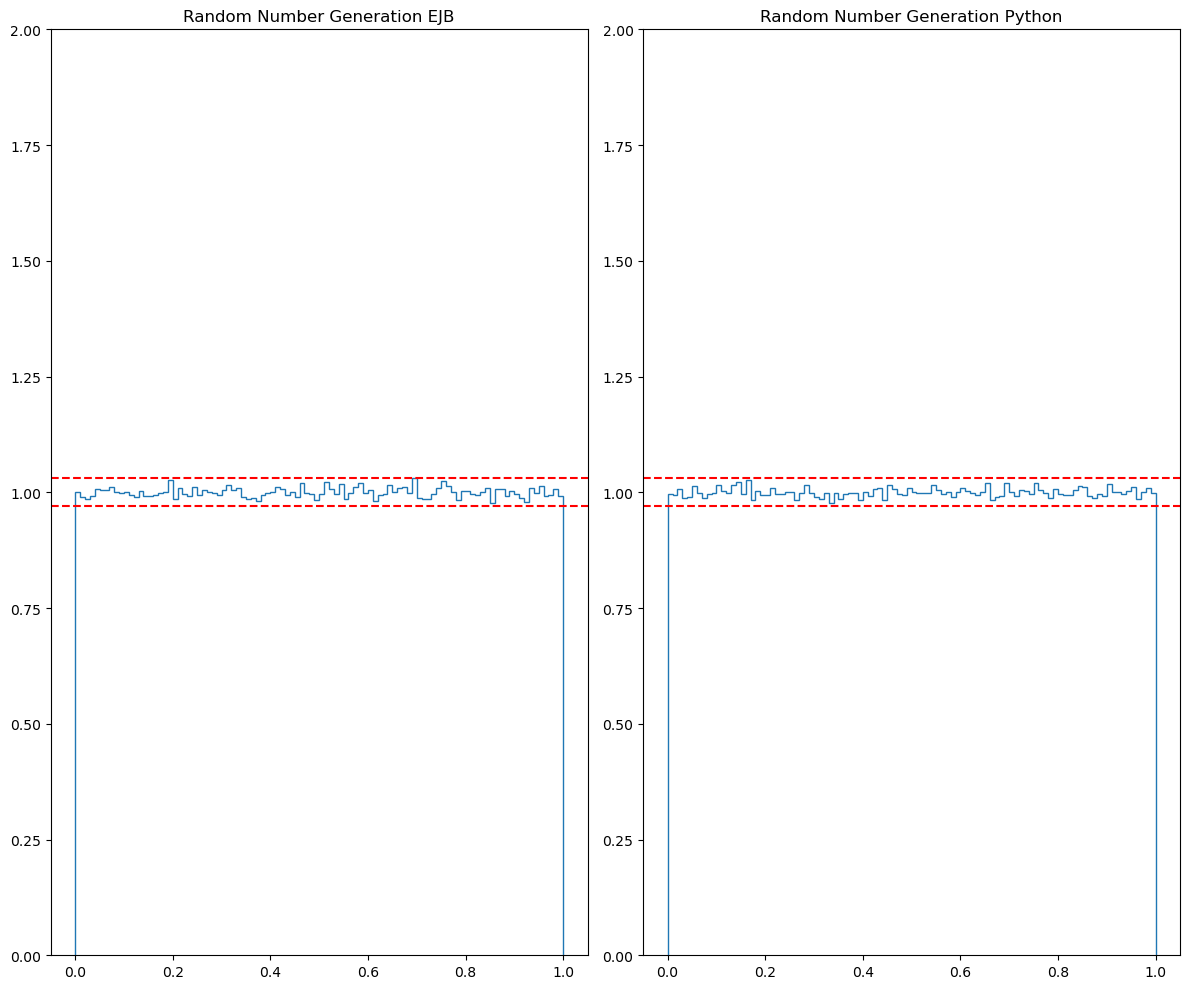

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time

# Set the seed for random number generation
iseed = 1
random.seed(iseed)
seedLCG(iseed)

# Define the number of points, seed, and number of bins
npoints = 1000000
nbins = 100

# Set the LCG seed
np.random.seed(iseed)

# Create a figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 10))

# Generate random numbers using the EJB algorithm and fill the histogram
ticks = time.time()
ejb_data = []
for i in range(npoints):
    ejb_data.append(rand_ejb())

axs[0].hist(ejb_data, bins=nbins, range=(0.0, 1.0), histtype='step', density=True)
ticks2 = time.time()
print("elapsed time = %.3f" % (ticks2 - ticks))

# Generate random numbers using the Python random module and fill the histogram
ticks3 = time.time()
python_data = [random.uniform(0.0, 1.0) for _ in range(npoints)]
axs[1].hist(python_data, bins=nbins, range=(0.0, 1.0), histtype='step', density=True)
ticks4 = time.time()
print("elapsed time = %.3f" % (ticks4 - ticks3))

# Calculate the three-sigma error
error = 3.0 / np.sqrt(npoints / nbins)
print("Three-sigma Error = %f" % error)

# Add horizontal lines for error
for ax in axs:
    ax.axhline(1 + error, color='r', linestyle='--')
    ax.axhline(1 - error, color='r', linestyle='--')

# Set the y-axis range for both subplots
for ax in axs:
    ax.set_ylim(1 - 2 * error, 1.0 + 2 * error)
    ax.set_ylim(0,2)

# Set titles for subplots
axs[0].set_title('Random Number Generation EJB')
axs[1].set_title('Random Number Generation Python')

# Show the plots
plt.tight_layout()
plt.show()

